# Gender embeddings

## Preparing data
本次作業練習需要利用預訓練好的詞向量（word embedding），以下提供作業資料下載與使用的方法及說明。

*   如果你在自己電腦做作業：使用老師原本設計的方式
    *   Download [the embedding](https://drive.google.com/file/d/1sfOjlQ0G_LXfvdBGFhIlG0UUj55GXhew/view?usp=sharing) `CBOW_iter15_2017-2018.bin` to your computer (Middle size, about 320 MB)
    *   請同學自行下載檔案並在本機環境執行作業檔案，如果碰到問題可以先就錯誤訊息到Google或其他平台上找答案，若真的無法解決再請同學到github問我們
*   如果你在colab上做作業：將資料下載到colab的環境

### 將資料下載到colab的環境

In [ ]:
# 直接執行這一行即可

!gdown --id '1OkR_STaIYXK6-BWY5RF1eikqysvML8-8' --output CBOW_iter15_2017-2018.bin 

# 若上一個連結不能用，請用這一個備用的連結
# !gdown --id '1sfOjlQ0G_LXfvdBGFhIlG0UUj55GXhew' --output CBOW_iter15_2017-2018.bin

Downloading...
From: https://drive.google.com/uc?id=1OkR_STaIYXK6-BWY5RF1eikqysvML8-8
To: /content/CBOW_iter15_2017-2018.bin
100% 320M/320M [00:02<00:00, 129MB/s]


## Loading data

In [123]:
from gensim.models import KeyedVectors
w2v = KeyedVectors.load_word2vec_format("../data/CBOW_iter15_2017-2018.bin", binary = True)
print(len(w2v.index2word))

265088


隨便找一個關鍵字來測試，可以知道每個詞被用300維的數字做代表。

In [124]:
len(w2v['女性'])

300

# Design

## (TODO) 建立男性與女性代詞序列與職業的序列。
- 查找20~30個女性相關的代名詞並指給list `female`。建議用word-embedding的方法去找到在上述w2v中哪些字跟你現下所選的詞彙最為接近，然後依序把他們增加進來，然後再查找、再增加進來，過了幾個回合，大概就可以判斷自己想找的字詞達到飽和，若再加進來也會增加一些亂七八糟的東西。這樣的方法是幫助你把相關詞彙通通找進來的好方法，避免根據某些關鍵字來搜尋相關主題的文章時有所遺漏。
- `male`和`occupation`則分別增加男性的代名詞和職業。



In [125]:
female = ["她", "妳", "女生", "女孩", "女士", "母親", "宅女", "白富美", "剩女", "直女", "女兒", "富家女", "女友", "異女", "女人", "女性", "姑姑", "阿姨", "伯母", "外婆", "阿嬤", "奶奶", "婦女", "熟女", "老婆", "妻子", "小姐", "表姊", "表妹", "孫女"]
male = ["他", "你", "男", "男生", "宅男", "高富帥", "父親", "長男", "直男", "兒子", "男友", "異男", "男人", "男性", "男子漢", "叔叔", "舅舅", "伯父", "外公", "阿公", "爺爺", "老公", "丈夫", "先生", "孫子", "表弟", "表哥", "男士", "紳士", "男方"]
occupation = ['警察', '保母', '護士', '老闆', "總統", "副總統", "立法委員", "市長", "議員", "助理", "部長", "次長", "經理", "總經理", "課長", "主席", "秘書", "教授", "老師", "鎮長", "里長", "幹部", "領導", "社長", "醫生", "外交官", "院長", "工程師", "顧問", "研究員"]

### Verify your vocabulary
You can use the following code to verify if your selected words exist in the wordEmbedding model. 
要注意的是，這些詞彙是否出現在w2v的詞彙中，如果沒有出現在w2v的詞彙中時，後續的計算程式會因為無法找到該文字的key而報錯。

In [126]:
for word in female+male+occupation:
    if word not in w2v.vocab:
        print(word)

# (TODO) Comparing gender stereotype of occupations 
- 你應該會有20~30個female words、20~30個male words、20~30個職業。
- 對於每個職業，去計算該職業和每個female words的similarity，求平均，假設為female_avg
- 對於每個職業，去計算該職業和每個male words的similarity，求平均，假設為male_avg
- 對於每個職業，印出該職業female_avg和male_avg哪個大，印的時候可以用ternary condition來判斷
```
"<" if female_avg > male_avg else ">"
```
- Expected results
```
警察	male(0.21)	>	female(0.16)
保母	male(0.19)	<	female(0.26)
護士	male(0.30)	<	female(0.31)
老闆	male(0.30)	>	female(0.28)
```

In [127]:
import numpy as np
male_avg = []
female_avg = []
# type(float(w2v.similarity("總統", "男性")))

for job in occupation:
    num_sum1 = 0
    num_sum2 = 0
    for man in male:
        # print(job, "\t", man, "\t", w2v.similarity(job, man))
        num_sum1 += float(w2v.similarity(job, man))
        continue
    male_avg.append(np.round(num_sum1/len(male), decimals = 4))
    
    for woman in female:
        # print(job, "\t", woman, "\t", w2v.similarity(job, woman))
        num_sum2 += float(w2v.similarity(job, woman))
        continue
    female_avg.append(np.round(num_sum2/len(female), decimals = 4))

print(male_avg)
print(female_avg)

[0.1597, 0.1644, 0.2549, 0.2806, 0.065, 0.0532, -0.0023, 0.0596, 0.0858, 0.0812, 0.0502, -0.0052, 0.0477, -0.007, 0.0881, 0.0131, 0.0663, 0.0749, 0.2579, 0.0512, 0.1078, 0.0792, -0.0354, 0.1186, 0.2418, 0.1272, 0.055, 0.1062, -0.0114, -0.0158]
[0.1404, 0.1917, 0.2853, 0.2505, 0.0747, 0.0586, 0.0013, 0.0458, 0.0856, 0.0846, 0.0424, -0.008, 0.0506, -0.0264, 0.0754, -0.0041, 0.0764, 0.0586, 0.262, 0.0405, 0.1109, 0.0635, -0.0663, 0.0954, 0.25, 0.1367, 0.0479, 0.0763, -0.0167, -0.0041]


In [128]:
for i in range(0, 30):
    print(occupation[i], "\t", "male(%f)" % male_avg[i], "\t", "<" if female_avg[i] > male_avg[i] else ">", "\t", "female(%f)" % female_avg[i])

警察 	 male(0.159700) 	 > 	 female(0.140400)
保母 	 male(0.164400) 	 < 	 female(0.191700)
護士 	 male(0.254900) 	 < 	 female(0.285300)
老闆 	 male(0.280600) 	 > 	 female(0.250500)
總統 	 male(0.065000) 	 < 	 female(0.074700)
副總統 	 male(0.053200) 	 < 	 female(0.058600)
立法委員 	 male(-0.002300) 	 < 	 female(0.001300)
市長 	 male(0.059600) 	 > 	 female(0.045800)
議員 	 male(0.085800) 	 > 	 female(0.085600)
助理 	 male(0.081200) 	 < 	 female(0.084600)
部長 	 male(0.050200) 	 > 	 female(0.042400)
次長 	 male(-0.005200) 	 > 	 female(-0.008000)
經理 	 male(0.047700) 	 < 	 female(0.050600)
總經理 	 male(-0.007000) 	 > 	 female(-0.026400)
課長 	 male(0.088100) 	 > 	 female(0.075400)
主席 	 male(0.013100) 	 > 	 female(-0.004100)
秘書 	 male(0.066300) 	 < 	 female(0.076400)
教授 	 male(0.074900) 	 > 	 female(0.058600)
老師 	 male(0.257900) 	 < 	 female(0.262000)
鎮長 	 male(0.051200) 	 > 	 female(0.040500)
里長 	 male(0.107800) 	 < 	 female(0.110900)
幹部 	 male(0.079200) 	 > 	 female(0.063500)
領導 	 male(-0.035400) 	 > 	 female(-0.066300)

# (TODO) Visualization with PCA
照word embedding的教學抽取出所有上述職業和性別化稱謂的詞彙詞嵌入向量（每個字詞被表示為300維的向量），以PCA進行降維後，用Bokeh做視覺化，預期視覺化結果如下：
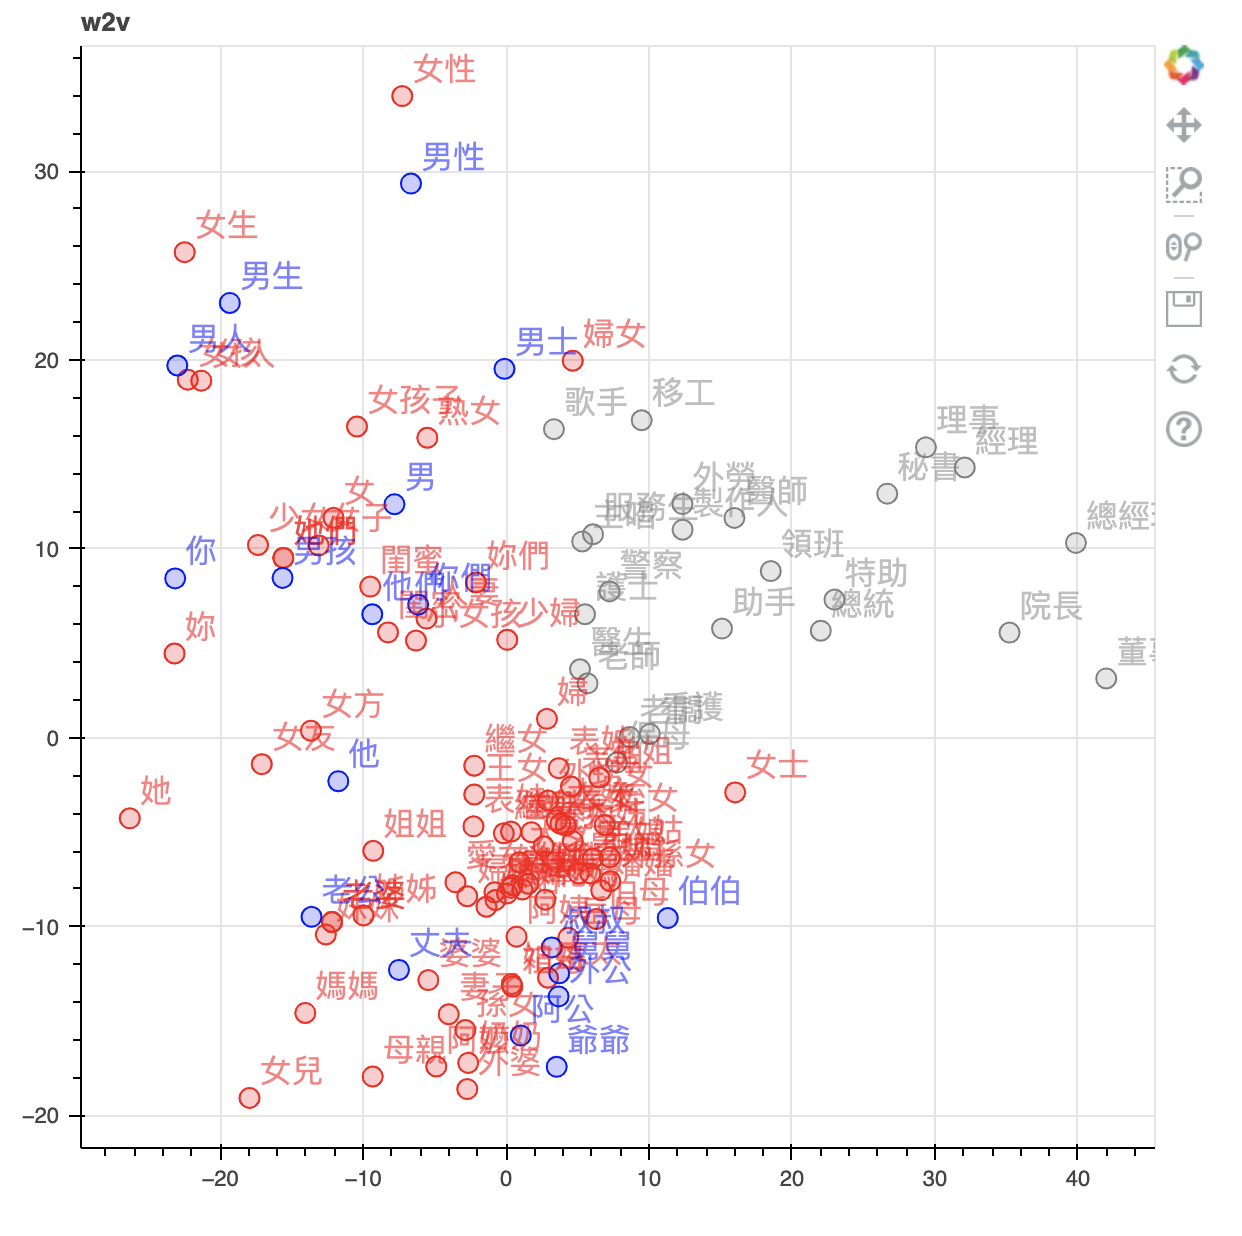


## Dimension reduction by PCA

In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X = []
for word in female+male+occupation:
    X.append(w2v[word])
points = pca.fit_transform(X)

## Constructing pandas dataframe for visualization

In [130]:
import pandas as pd
df1 = pd.DataFrame(points, columns = ['x', 'y'])
words = female+male+occupation
df1['label'] = words
color = []
for index, row in df1.iterrows():
    if index >= 0 and index < 30:
        color.append("red")
    if index >= 30 and index < 60:
        color.append("blue")
    if index >= 60 and index < 90:
        color.append("grey")
df1['color'] = color
df1

x          y label color
0  -30.177162  -3.634874     她   red
1  -23.983871   8.818771     妳   red
2  -18.642506  28.305374    女生   red
3  -19.942212  19.722356    女孩   red
4    7.044716 -14.729888    女士   red
..        ...        ...   ...   ...
85  13.809088   6.099876   外交官  grey
86  30.605630 -12.360396    院長  grey
87  16.881894   9.703949   工程師  grey
88  35.626257   0.967691    顧問  grey
89  30.071617   6.783912   研究員  grey

[90 rows x 4 columns]

## Visualization by bokeh

In [131]:
# !pip install bokeh
# !pip install jupyter_bokeh
from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [132]:
# 初始化一個 figure
p = figure(title = "w2v")

# 畫點圖
p.circle(df1["x"], df1["y"], color=color, fill_alpha=0.2, size=10)

labels = LabelSet(x='x', y='y', text='label', 
                  # 設定文字 label 跟點的距離
                  x_offset=5, y_offset=5, 
                  # 把 df 轉成 columndatasource 才能上 label
                  source=ColumnDataSource(df1), render_mode='canvas')

# 把 labels 的 layout 加入 p
p.add_layout(labels)
show(p)

# Visualization with t-SNE

## Dimension reduction by t-SNE

In [133]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X = []
for word in female+male+occupation:
    X.append(w2v[word])
points = tsne.fit_transform(X) 

C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [134]:
import pandas as pd
df2 = pd.DataFrame(points, columns = ['x', 'y'])
words = female+male+occupation
df2['label'] = words
color = []
for index, row in df2.iterrows():
    if index >= 0 and index < 30:
        color.append("red")
    if index >= 30 and index < 60:
        color.append("blue")
    if index >= 60 and index < 90:
        color.append("grey")
df2['color'] = color
df2

x         y label color
0   2.817972 -0.177864     她   red
1   5.572390  2.296824     妳   red
2   3.217845  4.371184    女生   red
3   3.655201  4.980031    女孩   red
4  -3.510778  7.352221    女士   red
..       ...       ...   ...   ...
85 -2.180391  1.907393   外交官  grey
86 -6.656833  1.872469    院長  grey
87 -2.817860  4.743526   工程師  grey
88 -3.983719  4.366600    顧問  grey
89  1.293118  1.624268   研究員  grey

[90 rows x 4 columns]

## Visualization

In [135]:
# 初始化一個 figure
p = figure(title = "w2v")

# 畫點圖
p.circle(df2["x"], df2["y"], color=color, fill_alpha=0.2, size=10)

labels = LabelSet(x='x', y='y', text='label', 
                  # 設定文字 label 跟點的距離
                  x_offset=5, y_offset=5, 
                  # 把 df 轉成 columndatasource 才能上 label
                  source=ColumnDataSource(df2), render_mode='canvas')

# 把 labels 的 layout 加入 p
p.add_layout(labels)
show(p)